In [7]:
import csmapi, os, pyproj, knoten
from osgeo import gdal
import urllib.request
import matplotlib.pyplot as plt
import knoten.csm as csm

In [3]:
# https://pdsimage2.wr.usgs.gov/Messenger/MSGRMDS_1001/DATA/2011_125/
# https://d3fhgbbgskqro0.cloudfront.net/MSGRMDS_1001/DATA/2011_125/EN0213110924M.IMG
# https://pdsimage2.wr.usgs.gov/Messenger/MSGRMDS_1001/DATA/2011_124/
# https://d3fhgbbgskqro0.cloudfront.net/MSGRMDS_1001/DATA/2011_124/EN0213023991M.IMG

img1url = 'https://d3fhgbbgskqro0.cloudfront.net/MSGRMDS_1001/DATA/2011_124/EN0213023991M.IMG'
img2url = 'https://d3fhgbbgskqro0.cloudfront.net/MSGRMDS_1001/DATA/2011_125/EN0213110924M.IMG'

image_dir = 'data'
EN0213023991M = os.path.join(image_dir, 'EN0213023991M.IMG')
EN0213110924M = os.path.join(image_dir, 'EN0213110924M.IMG')
downloader = urllib.request.URLopener()
if not os.path.isfile(EN0213023991M):
    downloader.retrieve(img1url, EN0213023991M)
if not os.path.isfile(EN0213110924M):
    downloader.retrieve(img2url, EN0213110924M)

('data/EN0213110924M.IMG', <http.client.HTTPMessage at 0x10bb2ee40>)

In [11]:
gdal.UseExceptions()
EN0213023991M_data = gdal.Open(EN0213023991M)
EN0213110924M_data = gdal.Open(EN0213110924M)

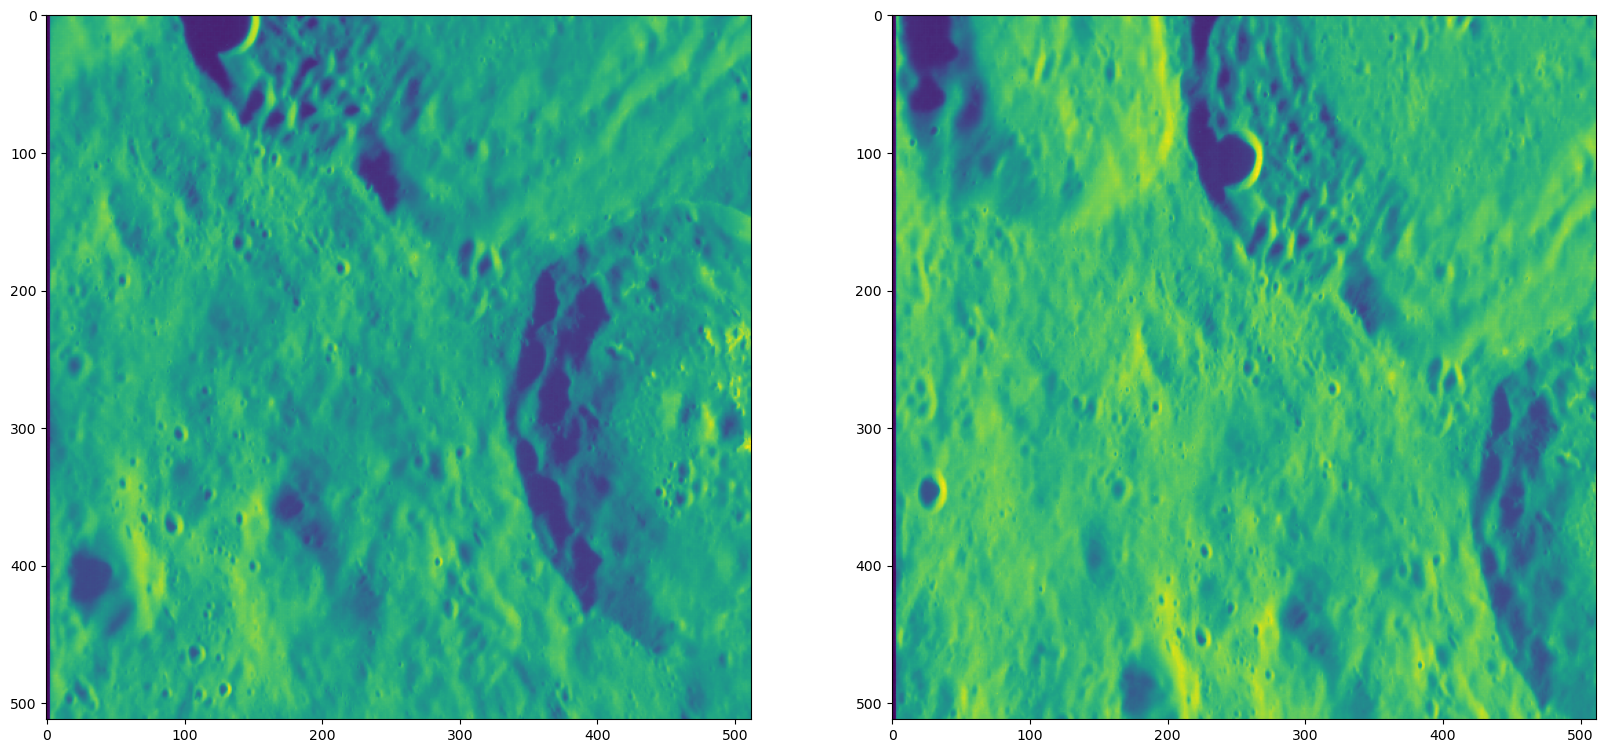

In [5]:
plt.figure(figsize=(20, 15))
ax = plt.subplot(1, 2, 1)
plt.imshow(EN0213023991M_data.ReadAsArray())
ax = plt.subplot(1, 2, 2)
plt.imshow(EN0213110924M_data.ReadAsArray())

In [8]:
EN0213023991M_cam = knoten.csm.create_csm(EN0213023991M)
EN0213110924M_cam = knoten.csm.create_csm(EN0213110924M)

In [9]:
EN0213023991M_size = EN0213023991M_cam.getImageSize()
EN0213110924M_size = EN0213110924M_cam.getImageSize()
EN0213023991M_pix_bound = knoten.csm.generate_boundary([EN0213023991M_size.line, EN0213023991M_size.samp])
EN0213110924M_pix_bound = knoten.csm.generate_boundary([EN0213110924M_size.line, EN0213110924M_size.samp], 5)

AttributeError: 'NoneType' object has no attribute 'getImageSize'

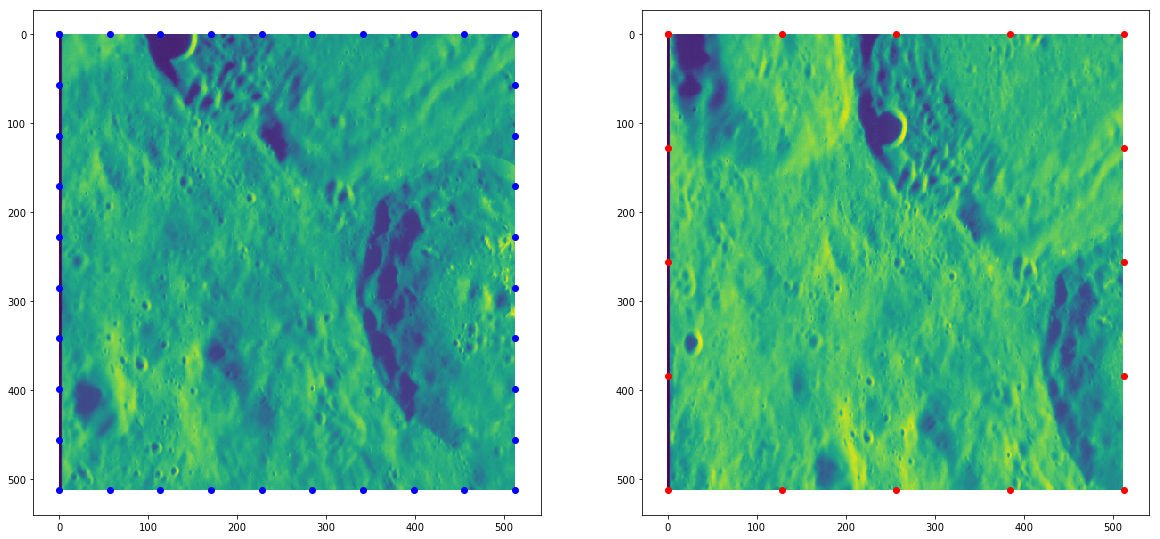

In [7]:
EN0213023991M_lines, EN0213023991M_samples = zip(*EN0213023991M_pix_bound)
EN0213110924M_lines, EN0213110924M_samples = zip(*EN0213110924M_pix_bound)
plt.figure(figsize=(20, 15))
ax = plt.subplot(1, 2, 1)
plt.imshow(EN0213023991M_data.ReadAsArray())
plt.scatter(EN0213023991M_samples, EN0213023991M_lines, c='b')
ax = plt.subplot(1, 2, 2)
plt.imshow(EN0213110924M_data.ReadAsArray())
plt.scatter(EN0213110924M_samples, EN0213110924M_lines, c='r')

In [8]:
semi_major = 2439.4*10e3
semi_minor = 2439.4*10e3 # Hard code for now, SettableEllipsoid isn't available via the SWIG wrapper
EN0213023991M_lons, EN0213023991M_lats, EN0213023991M_alts = knoten.csm.generate_latlon_boundary(EN0213023991M_cam, EN0213023991M_pix_bound, semi_major, semi_minor)
EN0213110924M_lons, EN0213110924M_lats, EN0213110924M_alts = knoten.csm.generate_latlon_boundary(EN0213110924M_cam, EN0213110924M_pix_bound, semi_major, semi_minor)

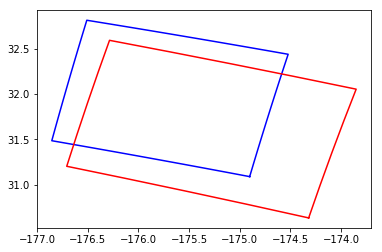

In [9]:
plt.plot(EN0213023991M_lons, EN0213023991M_lats, 'b')
plt.plot(EN0213110924M_lons, EN0213110924M_lats, 'r')

In [10]:
EN0213023991M_gcps = knoten.csm.generate_gcps(EN0213023991M_cam, EN0213023991M_pix_bound)
EN0213110924M_gcps = knoten.csm.generate_gcps(EN0213110924M_cam, EN0213110924M_pix_bound)
proj_str = '+proj=longlat +a={} +b={} +no_defs'.format(semi_major, semi_minor)
EN0213023991M_vrt = knoten.csm.generate_vrt([512, 512], EN0213023991M_gcps, EN0213023991M, proj_str)
EN0213110924M_vrt = knoten.csm.generate_vrt([512, 512], EN0213110924M_gcps, EN0213110924M, proj_str)

In [11]:
warp_options = gdal.WarpOptions(format='VRT', dstNodata=0)
EN0213023991M_lvl2 = 'EN0213023991M_lvl2.tif'
EN0213110924M_lvl2 = 'EN0213110924M_lvl2.tif'
EN0213023991M_lvl2_data = gdal.Warp(EN0213023991M_lvl2, EN0213023991M_vrt, options=warp_options)
EN0213110924M_lvl2_data = gdal.Warp(EN0213110924M_lvl2, EN0213110924M_vrt, options=warp_options)

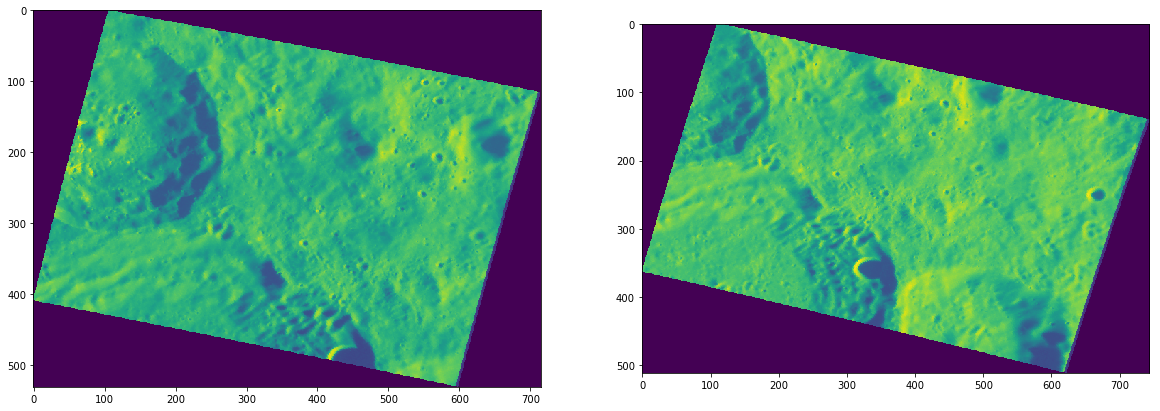

In [12]:
plt.figure(figsize=(20, 15))
ax = plt.subplot(1, 2, 1)
plt.imshow(EN0213023991M_lvl2_data.ReadAsArray())
ax = plt.subplot(1, 2, 2)
plt.imshow(EN0213110924M_lvl2_data.ReadAsArray())